In [1]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
data = pd.read_csv("final_1minutes.csv")
data.drop(['Month'], axis =1, inplace= True)
#data.set_index("time", inplace= True)
num_pickups = data.total
num_green_pickups = data.green
num_yellow_pickups = data.yellow
data.drop(['Unnamed: 0',  'green', 'yellow', 'total'], axis =1, inplace = True)

In [3]:
def series_to_supervised(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    
    if dropnan:
        agg.dropna(inplace = True)
        
    return agg

In [4]:
#normalize data & make LSTM model structure
features_and_target = pd.concat([data, num_pickups], axis = 1)
values = features_and_target.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(values)

n_hours = 47

reframed = series_to_supervised(scaled, n_hours, 1)

n_features = features_and_target.shape[1]


In [5]:
# exlcude significantly deviated data
total_values = reframed.values
n_p = np.argmin(total_values[365*24*3*60:, -1])
n_p = n_p + 365*24*3*60

a = total_values[: n_p, :]
b = total_values[n_p + n_hours + 60 + 1 : , :]
values = np.concatenate((a, b), axis=0)

# result variable
result = np.zeros((5, 7))

Train on 225257 samples, validate on 55543 samples
Epoch 1/100
 - 91s - loss: 0.0247 - val_loss: 0.0146
Epoch 2/100
 - 90s - loss: 0.0167 - val_loss: 0.0154
Epoch 3/100
 - 91s - loss: 0.0163 - val_loss: 0.0175
Epoch 4/100
 - 90s - loss: 0.0157 - val_loss: 0.0144
Epoch 5/100
 - 91s - loss: 0.0155 - val_loss: 0.0166
Epoch 6/100
 - 90s - loss: 0.0158 - val_loss: 0.0143
Epoch 7/100
 - 91s - loss: 0.0149 - val_loss: 0.0130
Epoch 8/100
 - 91s - loss: 0.0149 - val_loss: 0.0181
Epoch 9/100
 - 90s - loss: 0.0148 - val_loss: 0.0140
Epoch 10/100
 - 91s - loss: 0.0145 - val_loss: 0.0125
Epoch 11/100
 - 90s - loss: 0.0144 - val_loss: 0.0156
Epoch 12/100
 - 91s - loss: 0.0148 - val_loss: 0.0153
Epoch 13/100
 - 90s - loss: 0.0145 - val_loss: 0.0156
Epoch 14/100
 - 91s - loss: 0.0144 - val_loss: 0.0130
Epoch 15/100
 - 90s - loss: 0.0143 - val_loss: 0.0138
Epoch 16/100
 - 90s - loss: 0.0144 - val_loss: 0.0161
Epoch 17/100
 - 90s - loss: 0.0143 - val_loss: 0.0137
Epoch 18/100
 - 91s - loss: 0.0144 - val

 - 88s - loss: 0.0140 - val_loss: 0.0145
Epoch 52/100
 - 90s - loss: 0.0140 - val_loss: 0.0158
Epoch 53/100
 - 90s - loss: 0.0141 - val_loss: 0.0186
Epoch 54/100
 - 90s - loss: 0.0141 - val_loss: 0.0142
Epoch 55/100
 - 91s - loss: 0.0140 - val_loss: 0.0170
Epoch 56/100
 - 90s - loss: 0.0141 - val_loss: 0.0152
Epoch 57/100
 - 91s - loss: 0.0141 - val_loss: 0.0188
Epoch 58/100
 - 91s - loss: 0.0140 - val_loss: 0.0139
Epoch 59/100
 - 90s - loss: 0.0140 - val_loss: 0.0169
Epoch 60/100
 - 90s - loss: 0.0140 - val_loss: 0.0156
Epoch 61/100
 - 91s - loss: 0.0140 - val_loss: 0.0135
Epoch 62/100
 - 90s - loss: 0.0140 - val_loss: 0.0159
Epoch 63/100
 - 90s - loss: 0.0141 - val_loss: 0.0132
Epoch 64/100
 - 91s - loss: 0.0140 - val_loss: 0.0127
Epoch 65/100
 - 91s - loss: 0.0141 - val_loss: 0.0142
Epoch 66/100
 - 93s - loss: 0.0141 - val_loss: 0.0130
Epoch 67/100
 - 93s - loss: 0.0140 - val_loss: 0.0145
Epoch 68/100
 - 90s - loss: 0.0141 - val_loss: 0.0139
Epoch 69/100
 - 91s - loss: 0.0141 - val_

 - 92s - loss: 0.0227 - val_loss: 0.0141
Epoch 2/100
 - 91s - loss: 0.0162 - val_loss: 0.0185
Epoch 3/100
 - 91s - loss: 0.0153 - val_loss: 0.0144
Epoch 4/100
 - 91s - loss: 0.0155 - val_loss: 0.0135
Epoch 5/100
 - 91s - loss: 0.0151 - val_loss: 0.0145
Epoch 6/100
 - 92s - loss: 0.0149 - val_loss: 0.0153
Epoch 7/100
 - 91s - loss: 0.0148 - val_loss: 0.0151
Epoch 8/100
 - 92s - loss: 0.0146 - val_loss: 0.0127
Epoch 9/100
 - 91s - loss: 0.0146 - val_loss: 0.0126
Epoch 10/100
 - 92s - loss: 0.0145 - val_loss: 0.0128
Epoch 11/100
 - 91s - loss: 0.0146 - val_loss: 0.0148
Epoch 12/100
 - 92s - loss: 0.0144 - val_loss: 0.0157
Epoch 13/100
 - 91s - loss: 0.0145 - val_loss: 0.0129
Epoch 14/100
 - 92s - loss: 0.0144 - val_loss: 0.0203
Epoch 15/100
 - 90s - loss: 0.0143 - val_loss: 0.0130
Epoch 16/100
 - 92s - loss: 0.0143 - val_loss: 0.0138
Epoch 17/100
 - 90s - loss: 0.0143 - val_loss: 0.0147
Epoch 18/100
 - 91s - loss: 0.0143 - val_loss: 0.0125
Epoch 19/100
 - 91s - loss: 0.0142 - val_loss: 0.

KeyboardInterrupt: 

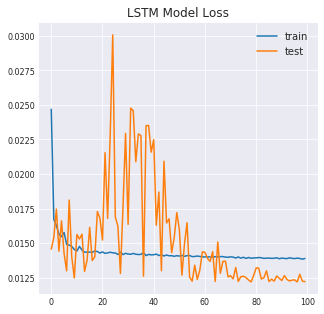

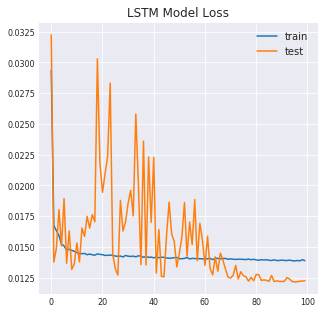

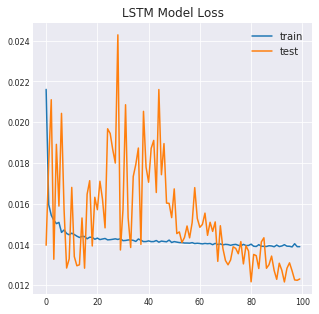

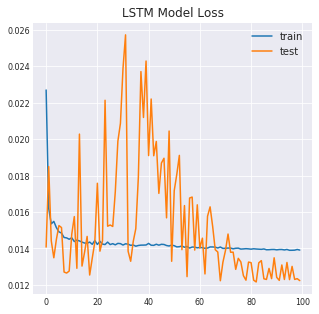

In [6]:
for i in range (7):
    values = total_values[total_values[:, -8] == total_values[120 + 24*i, 5]]
    n_train_hours = 225257
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(24, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # fit network
    history = model.fit(train_X, train_y, epochs=100, batch_size=100,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
    
    history_loss = pd.DataFrame()
    history_loss['train'] = history.history['loss']
    history_loss['test'] = history.history['val_loss']
    history_loss.plot(figsize=(5,5), fontsize=8,
                title='LSTM Model Loss');
    
    # make a prediction 
    yhat = model.predict(test_X)
    # reshape back to 2d
    test_X = test_X.reshape((test_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat = np.concatenate((test[:, 235:239], yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test[:, 235:239], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    inv_yhat_gte_zero = inv_yhat.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    # calculate r2
    result[0, i] = r2_score(inv_y, inv_yhat)

    # calculate mean absolute error
    result[1, i] = mean_absolute_error(inv_y, inv_yhat)

    # calculate rmse
    rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
    result[2, i]= rmse

    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y - inv_yhat)/inv_y))*100
    result[3, i] = maep
    
    #train bias
    yhat_t = model.predict(train_X)
    # reshape back to 2d
    train_X = train_X.reshape((train_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat_t = np.concatenate((train[:, 235:239], yhat_t), axis=1)
    inv_yhat_t = scaler.inverse_transform(inv_yhat_t)
    inv_yhat_t = inv_yhat_t[:,-1]

    # invert scaling for actual
    train_y = train_y.reshape((len(train_y), 1))
    inv_y_t = np.concatenate((train[:, 235:239], train_y), axis=1)
    inv_y_t = scaler.inverse_transform(inv_y_t)
    inv_y_t = inv_y_t[:,-1]
    inv_yhat_gte_zero = inv_yhat_t.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    index = (np.abs((inv_y_t - inv_yhat_t)/inv_y_t) < 1)
    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y_t[index] - inv_yhat_t[index])/inv_y_t[index]))*100
    
    result[4, i] = maep

In [7]:
result

array([[ 0.97739982,  0.97731584,  0.97700463,  0.97707304,  0.        ,
         0.        ,  0.        ],
       [12.31046486, 12.33949184, 12.40036583, 12.33231163,  0.        ,
         0.        ,  0.        ],
       [16.10004617, 16.12993127, 16.24020137, 16.21602518,  0.        ,
         0.        ,  0.        ],
       [ 7.7351056 ,  7.62838051,  7.52845481,  7.43509382,  0.        ,
         0.        ,  0.        ],
       [ 6.77554458,  6.53565377,  6.57253638,  6.6437453 ,  0.        ,
         0.        ,  0.        ]])

Train on 225257 samples, validate on 55543 samples
Epoch 1/100
 - 73s - loss: 0.0242 - val_loss: 0.0210
Epoch 2/100
 - 91s - loss: 0.0166 - val_loss: 0.0142
Epoch 3/100
 - 90s - loss: 0.0162 - val_loss: 0.0145
Epoch 4/100
 - 90s - loss: 0.0155 - val_loss: 0.0132
Epoch 5/100
 - 92s - loss: 0.0151 - val_loss: 0.0151
Epoch 6/100
 - 90s - loss: 0.0149 - val_loss: 0.0151
Epoch 7/100
 - 91s - loss: 0.0149 - val_loss: 0.0129
Epoch 8/100
 - 91s - loss: 0.0146 - val_loss: 0.0127
Epoch 9/100
 - 91s - loss: 0.0146 - val_loss: 0.0125
Epoch 10/100
 - 91s - loss: 0.0144 - val_loss: 0.0126
Epoch 11/100
 - 91s - loss: 0.0144 - val_loss: 0.0150
Epoch 12/100
 - 91s - loss: 0.0145 - val_loss: 0.0154
Epoch 13/100
 - 92s - loss: 0.0144 - val_loss: 0.0171
Epoch 14/100
 - 91s - loss: 0.0145 - val_loss: 0.0123
Epoch 15/100
 - 92s - loss: 0.0144 - val_loss: 0.0183
Epoch 16/100
 - 91s - loss: 0.0143 - val_loss: 0.0161
Epoch 17/100
 - 92s - loss: 0.0144 - val_loss: 0.0131
Epoch 18/100
 - 92s - loss: 0.0142 - val

 - 92s - loss: 0.0142 - val_loss: 0.0132
Epoch 52/100
 - 93s - loss: 0.0142 - val_loss: 0.0122
Epoch 53/100
 - 92s - loss: 0.0141 - val_loss: 0.0130
Epoch 54/100
 - 92s - loss: 0.0141 - val_loss: 0.0135
Epoch 55/100
 - 92s - loss: 0.0141 - val_loss: 0.0135
Epoch 56/100
 - 93s - loss: 0.0141 - val_loss: 0.0136
Epoch 57/100
 - 92s - loss: 0.0141 - val_loss: 0.0133
Epoch 58/100
 - 93s - loss: 0.0141 - val_loss: 0.0122
Epoch 59/100
 - 92s - loss: 0.0141 - val_loss: 0.0123
Epoch 60/100
 - 93s - loss: 0.0141 - val_loss: 0.0121
Epoch 61/100
 - 92s - loss: 0.0140 - val_loss: 0.0126
Epoch 62/100
 - 93s - loss: 0.0140 - val_loss: 0.0139
Epoch 63/100
 - 91s - loss: 0.0141 - val_loss: 0.0123
Epoch 64/100
 - 93s - loss: 0.0140 - val_loss: 0.0122
Epoch 65/100
 - 92s - loss: 0.0140 - val_loss: 0.0124
Epoch 66/100
 - 93s - loss: 0.0140 - val_loss: 0.0131
Epoch 67/100
 - 91s - loss: 0.0140 - val_loss: 0.0122
Epoch 68/100
 - 90s - loss: 0.0140 - val_loss: 0.0123
Epoch 69/100
 - 89s - loss: 0.0140 - val_

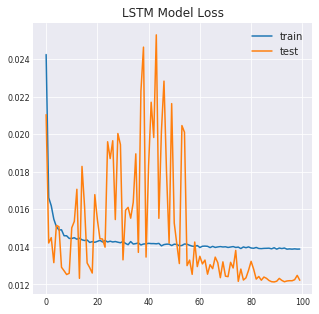

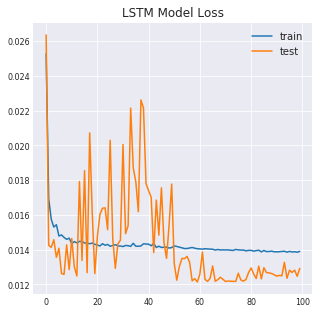

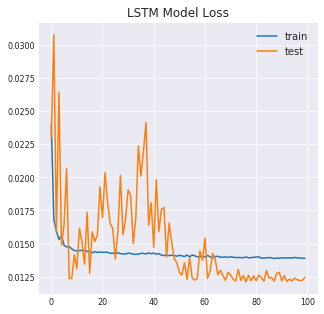

In [6]:
for i in range (4, 7):
    values = total_values[total_values[:, -8] == total_values[120 + 24*i, 5]]
    n_train_hours = 225257
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(24, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # fit network
    history = model.fit(train_X, train_y, epochs=100, batch_size=100,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
    
    history_loss = pd.DataFrame()
    history_loss['train'] = history.history['loss']
    history_loss['test'] = history.history['val_loss']
    history_loss.plot(figsize=(5,5), fontsize=8,
                title='LSTM Model Loss');
    
    # make a prediction 
    yhat = model.predict(test_X)
    # reshape back to 2d
    test_X = test_X.reshape((test_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat = np.concatenate((test[:, 235:239], yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test[:, 235:239], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    inv_yhat_gte_zero = inv_yhat.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    # calculate r2
    result[0, i] = r2_score(inv_y, inv_yhat)

    # calculate mean absolute error
    result[1, i] = mean_absolute_error(inv_y, inv_yhat)

    # calculate rmse
    rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
    result[2, i]= rmse

    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y - inv_yhat)/inv_y))*100
    result[3, i] = maep
    
    #train bias
    yhat_t = model.predict(train_X)
    # reshape back to 2d
    train_X = train_X.reshape((train_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat_t = np.concatenate((train[:, 235:239], yhat_t), axis=1)
    inv_yhat_t = scaler.inverse_transform(inv_yhat_t)
    inv_yhat_t = inv_yhat_t[:,-1]

    # invert scaling for actual
    train_y = train_y.reshape((len(train_y), 1))
    inv_y_t = np.concatenate((train[:, 235:239], train_y), axis=1)
    inv_y_t = scaler.inverse_transform(inv_y_t)
    inv_y_t = inv_y_t[:,-1]
    inv_yhat_gte_zero = inv_yhat_t.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    index = (np.abs((inv_y_t - inv_yhat_t)/inv_y_t) < 1)
    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y_t[index] - inv_yhat_t[index])/inv_y_t[index]))*100
    
    result[4, i] = maep

In [7]:
result

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.97714602,
         0.97486044,  0.97641418],
       [ 0.        ,  0.        ,  0.        ,  0.        , 12.31688881,
        13.02807331, 12.5700016 ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 16.19019475,
        16.98048268, 16.44737869],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  7.35767633,
         8.09993744,  7.60046765],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  6.62987456,
         6.54872656,  6.42831773]])